In [1]:
from pandas import read_csv
dataframe = read_csv('data_banknote_authentication.txt')

In [2]:
dataframe.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
titles = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

In [8]:
dataframe = read_csv('data_banknote_authentication.txt', names= titles)

In [9]:
dataframe.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
print(dataframe.shape)

(1372, 5)


In [11]:
print(dataframe.describe())

          Variance     Skewness     Kurtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [13]:
print(dataframe.groupby('Class').size())

Class
0    762
1    610
dtype: int64


Variance       AxesSubplot(0.125,0.125;0.133621x0.755)
Skewness    AxesSubplot(0.285345,0.125;0.133621x0.755)
Kurtosis     AxesSubplot(0.44569,0.125;0.133621x0.755)
Entropy     AxesSubplot(0.606034,0.125;0.133621x0.755)
Class       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

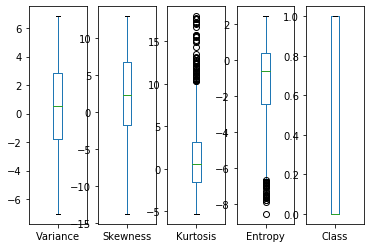

In [17]:

dataframe.plot(kind = 'box', subplots='True')

In [43]:
X = dataframe.iloc[:,0:4]
y = dataframe.iloc[:, -1:]
X.head()


,Variance,Skewness,Kurtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [44]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [45]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [46]:
X.shape

(1372, 4)

In [47]:
y.shape

(1372, 1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 21)

In [66]:
X_train.shape

(1097, 4)

In [67]:
X_test.shape

(275, 4)

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions = log_reg.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9854545454545455


In [70]:
print(confusion_matrix(y_test, predictions))

[[150   3]
 [  1 121]]


The top left: true negative (something that has been classified as 0 and correctly)
The top right: False Positive (something classified as 1 but incorrect, actual value is 0)
The bottom left: False negative (something clssified as 0 but incorrect, actual value is 1)
The bottom right: True positive (something that has been classified as 1 and correctly so)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [72]:
print(y_test.groupby('Class').size())

Class
0    153
1    122
dtype: int64


In the confusion_matrix function, we do not know how it determines which class (0 or 1) is defined as negative or positive when determining true/false negative/positives. So, to determine this, print out the number of instances of each class in the y_test dataframe. 
Class 0 has 146 instances. As per our confusion matrix, we have 145 true negatives. This means that the 0 class is negative. The 1 class is positive. 
Class 0 in the data means that a banknote is authentic, and class 1 means it is counterfeit. 
As per the confusion matrix,
we have 145 true negatives: meaning 145 have been correctly identified as authentic banknotes. 1 has been incorrectly classified as counterfeit (it is actually authentic). 
We have 1 False Negative: incorrectly classified as authentic (is actually counterfeit). 
We have 128 true positives: meaning correctly classified as counterfeit. 

In this case we want to minimize the number of False negatives. This means: we want Higher Precision than Recall. 


In [73]:
total_predictions = log_reg.predict(X)
print(accuracy_score(y, total_predictions))

0.9905247813411079


In [74]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators = 200, random_state=0)
rand_for.fit(X_train, y_train)
rand_predictions = rand_for.predict(X_test)
print(accuracy_score(y_test, rand_predictions))

/Users/Sivankit/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9963636363636363


In [75]:
print(confusion_matrix(y_test, rand_predictions))

[[152   1]
 [  0 122]]


We see using the Random Forest Classifier that we are able to get rid of the 1 False Negative. 